## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

#For the outlier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.3', '1.5.3', '0.12.2', '3.7.1')

## 1. Load data

In [3]:
df = pd.read_csv('Cars.csv')

#This one is for experimenting
df1 = pd.read_csv('Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of data
df.shape

(8128, 13)

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

Renaming

Not really matter, just for the sake of follow the instruction of Prof case study

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
# rename columns
df.rename(columns = {'selling_price':'sellP', 
                     'km_driven':'km', 
                     'seller_type':'seller', 
                     'transmission':'trans', 
                     'max_power':'power'}, inplace = True)

In [11]:
# Notice that the column names changed
df.columns

Index(['name', 'year', 'sellP', 'km', 'fuel', 'seller', 'trans', 'owner',
       'mileage', 'engine', 'power', 'torque', 'seats'],
      dtype='object')

Task 1.1) Map owner by number instead of text

In [12]:
#Mapping dictionary
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

#Replace values in the 'owner' column using the .replace
df['owner'].replace(owner_mapping, inplace=True)

df.head()



,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Or you can create another column if you want to, but to follow the task. I will be using the replace method


In [13]:
owner_mapping_experiment = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Create a new column 'owner_numeric' with numerical values
    #df['owner_numeric'] = df['owner'].map(owner_mapping)
    


Task 1.2) Cut CNG and LPG off

In [14]:
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
# '~' is used to invert the mask, selectin rows that do not have values we want, in this case it CNG & LPG
df.head()

,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Are we sure that LPG and CPG is actully gone?? Let's check



In [15]:
#Fuel column before removing
df1 = pd.read_csv('Cars.csv')
fuel_counts = df1['fuel'].value_counts()

print(fuel_counts)

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64


In [16]:
#After remove the LPG and CPG
fuel_countss = df['fuel'].value_counts()
print(fuel_countss)
#Diesel    4402, Petrol   3631 No LPG/CPG in sight

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64


Task 1.3) Remove "kmpl" from feature mileage and conver the column to numertical 

In [17]:
#Removing the kmpl from mileage column and then turn it into numerical (float)
#df['mileage'] = df['mileage'].str.split().str[0].astype(float)
#This line eror because .str ca only be using with string type, which mean as of rightnow this line is not sring. To fix this I covert it into string first before convert it again into float

df['mileage'] = df['mileage'].astype(str).str.split().str[0].astype(float)



#or Using pd.to_numeric which give use the same result as well
#df['mileage'] = pd.to_numeric(df['mileage'].str.replace(' kmpl', ''))

df.head()


,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Task 1.4) Remove "CC" in engine and convert the column to numerical type

In [18]:
#Same as 1.3
#df['engine'] = df['engine'].str.replace(' CC', '').astype(float)
df['engine'] = df['engine'].astype(str).str.split().str[0].astype(float)


df.head()

,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Task 1.5) Same as above, but this time 'max power'

In [19]:
df['power'] = df['power'].astype(str).str.split().str[0].astype(float)


df.head()

,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


Task 1.6) Make it that column 'name' only show brand, which mean remove the model an left only the brand

In [20]:
#Replace the column with a new data, which is the same data, but keep only the first word and left the rest out
df['name'] = df['name'].str.split().str[0]

df.head()


,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


Task 1.7) Remove feature 'torque', customer doens't care about it 

In [21]:
df.drop('torque', axis=1, inplace=True)

df.head()

,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Task 1.8) Remove the owner type 'Test drive'/'5' because the price is too high compare the other type

In [22]:
df = df[df['owner'] != 5]
df.head()

#Check if there any 'Test Drive Cars' left
test_drive_counts = df['owner'].value_counts()

print(test_drive_counts)

1    5238
2    2073
3     547
4     170
Name: owner, dtype: int64


Task 1.9) 'Selling price' value is too big, may affect the stablilty of prediction. Transform the label using 'log transform' 


In [23]:
y = np.log(df['sellP'])

P.S. Don't forget to transform the predicted y back before comapring with y test

and the Final Data will look like....

In [24]:
df.head()

,name,year,sellP,km,fuel,seller,trans,owner,mileage,engine,power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

Soemthing cool (maybe?)

In [25]:
summary_stats = df.describe()



summary_cool = summary_stats.to_string(float_format="{:.2f}".format, na_rep='NaN')
print(summary_cool)


         year       sellP         km   owner  mileage  engine   power   seats
count 8028.00     8028.00    8028.00 8028.00  7814.00 7814.00 7820.00 7814.00
mean  2013.82   640393.65   69773.14    1.46    19.39 1462.91   91.82    5.42
std      4.03   802701.55   56644.19    0.72     4.00  504.76   35.80    0.96
min   1983.00    29999.00    1000.00    1.00     0.00  624.00    0.00    2.00
25%   2011.00   260000.00   35000.00    1.00    16.78 1197.00   68.85    5.00
50%   2015.00   450000.00   60000.00    1.00    19.30 1248.00   82.40    5.00
75%   2017.00   680000.00   98000.00    2.00    22.32 1582.00  102.00    5.00
max   2020.00 10000000.00 2360457.00    4.00    42.00 3604.00  400.00   14.00


#### Data Visualization

To understand the distribution of features and relationships, but mostly becaus it for the presentation

## Car Brand

First we try using see all the distibution of car brand

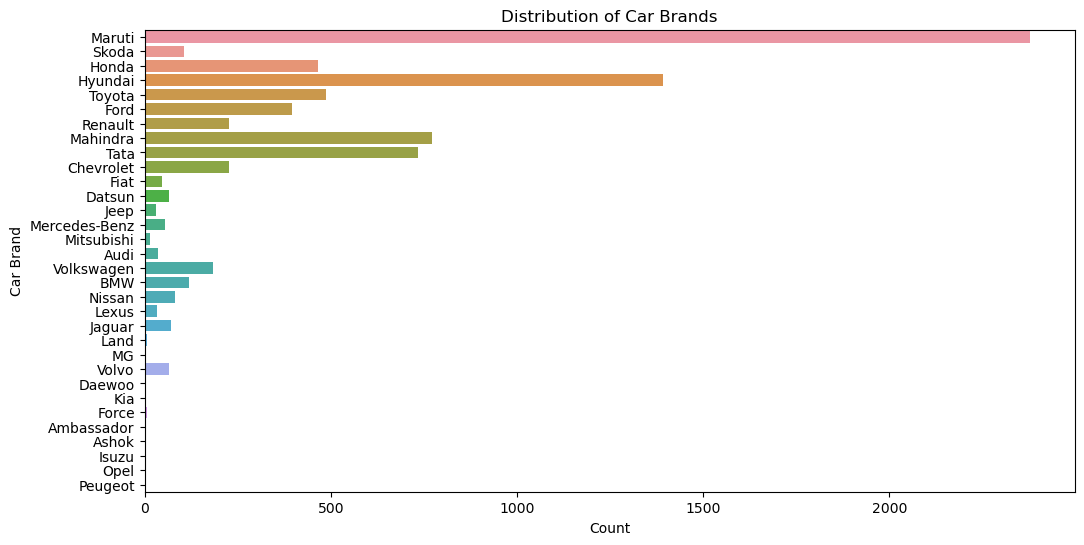

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='name')
plt.xlabel('Count')
plt.ylabel('Car Brand')
plt.title('Distribution of Car Brands')
plt.show()

while we can clearly see all the the brand, it still quite hard to look at and the balance is too off. 

To fix this, let show only the top 10 Brand

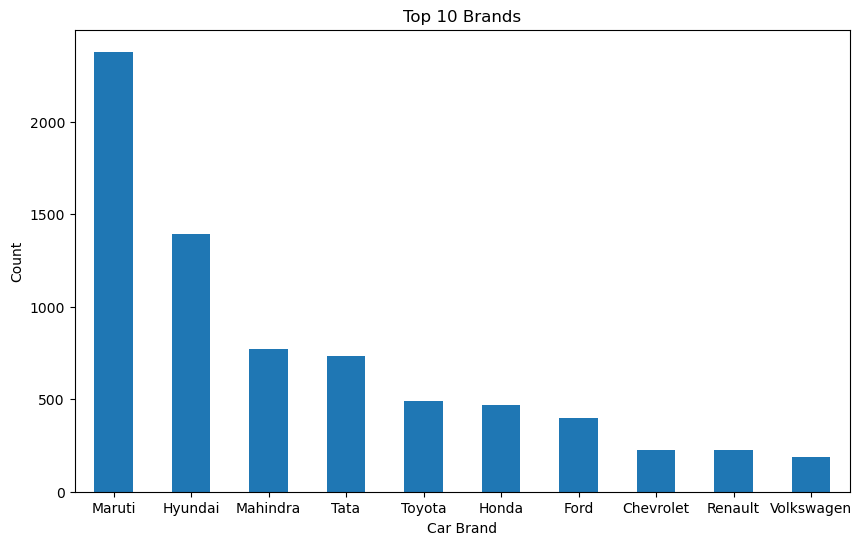

In [27]:
top_n = 10
top_car_names = df['name'].value_counts().head(top_n)
plt.figure(figsize=(10, 6))
top_car_names.plot(kind='bar')
plt.xlabel('Car Brand')
plt.ylabel('Count')
plt.title(f'Top {top_n} Brands')
plt.xticks(rotation=0)
plt.show()



As we can see, Maruti is the highest in all brand with Hyundai follow behind


## Selling Price

To see the how selling price fluctuation in each year

First let try Histogram plot

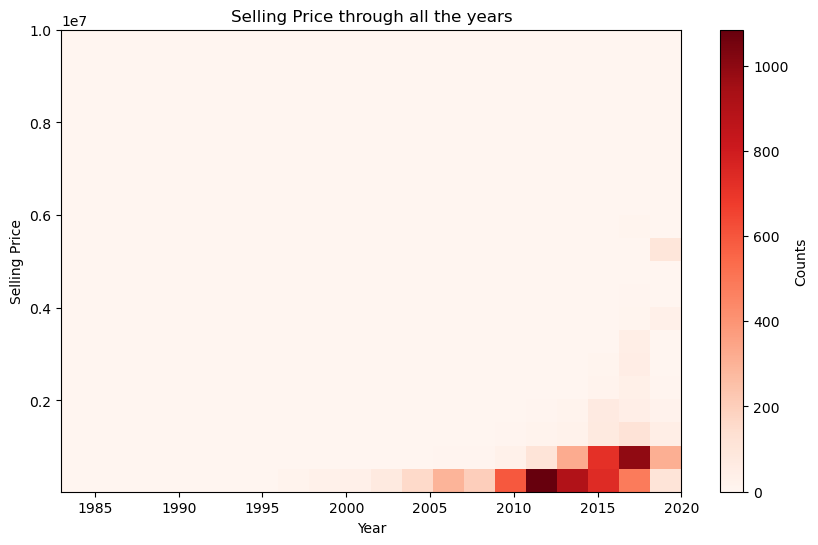

In [28]:
plt.figure(figsize=(10, 6))
plt.hist2d(df['year'], df['sellP'], bins=(20, 20), cmap=plt.cm.Reds)
plt.colorbar(label='Counts')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.show()

Look quite bad, let try line plot

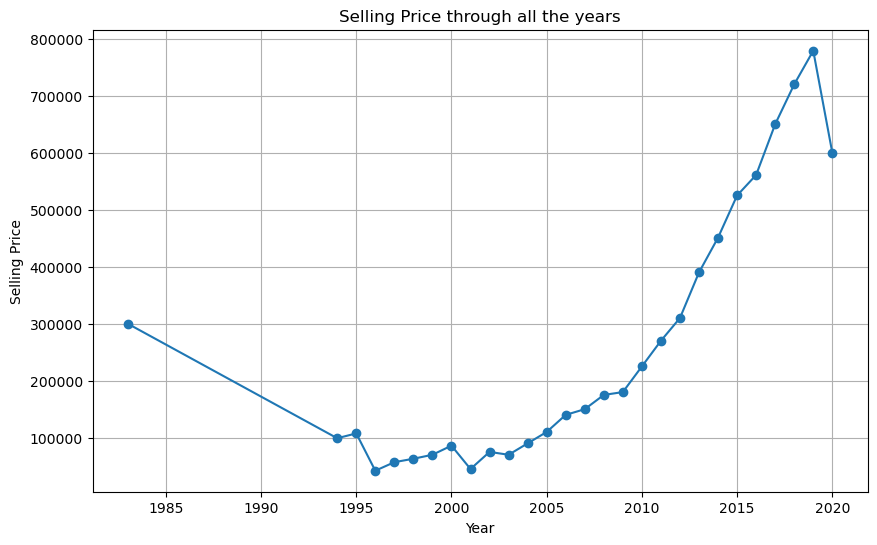

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('year')['sellP'].median(), marker='o')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.grid(True)
plt.show()

Look good, but maybe we can make it better. Maybe Seaborn can make it better

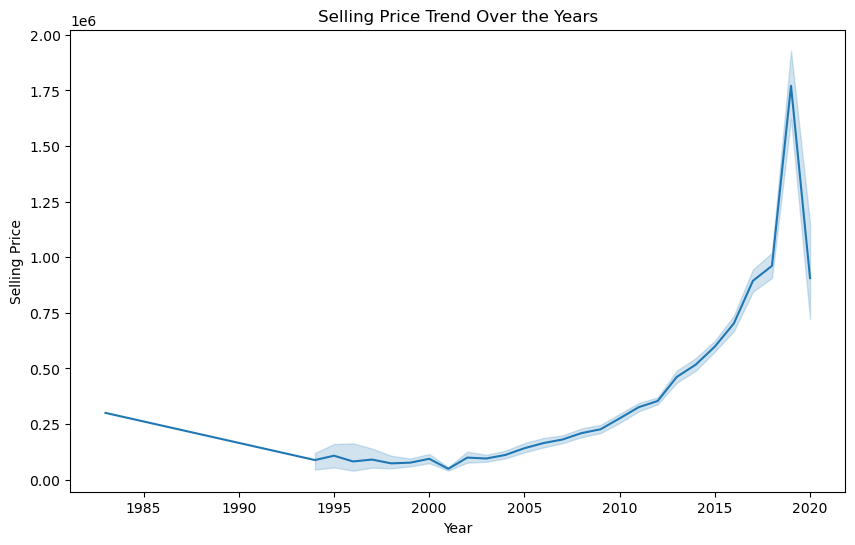

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='sellP')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price Trend Over the Years')
plt.show()

Nevermind, let try Bar chart next

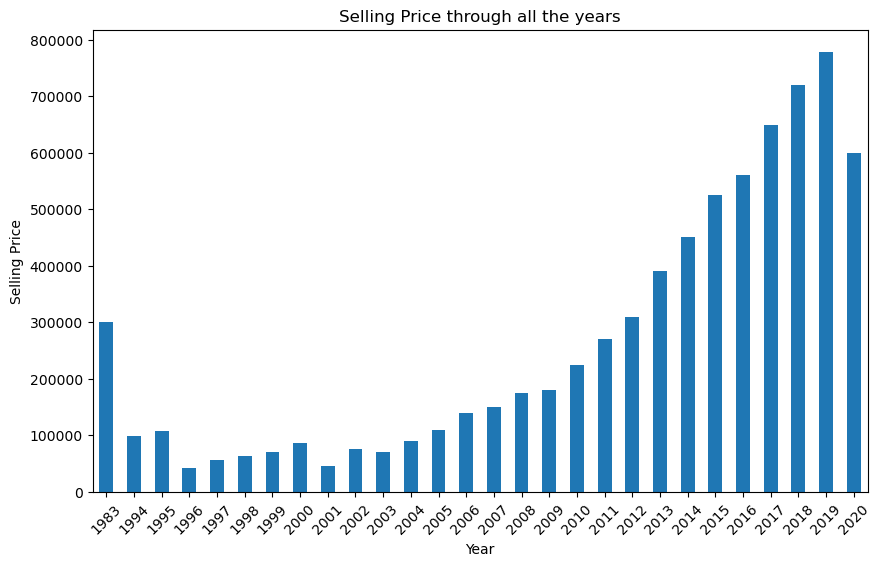

In [31]:
plt.figure(figsize=(10, 6))
df.groupby('year')['sellP'].median().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.xticks(rotation=45)
plt.show()


Look nice, again let's try Seaborn

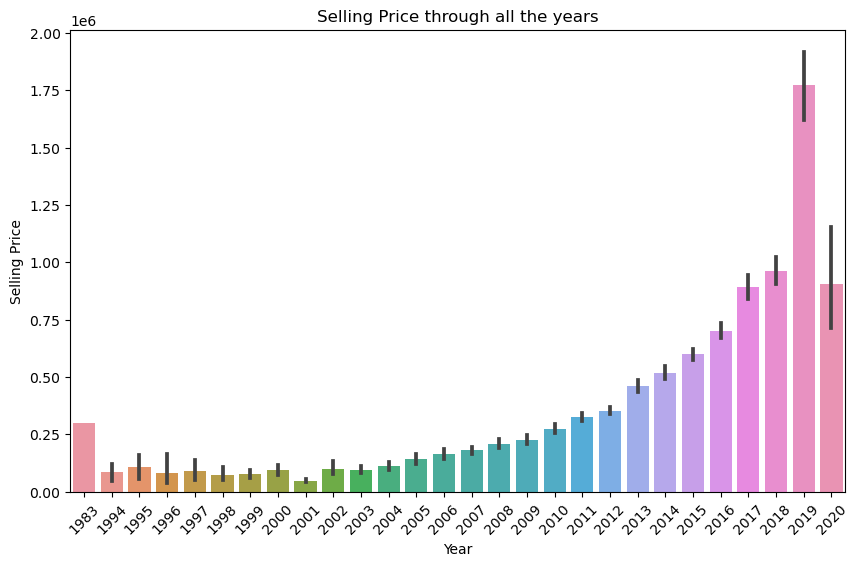

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='year', y='sellP')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.xticks(rotation=45)
plt.show()

While the chart look good to the eye, the data isn't. As you can see, the unusual spike in selling prices for cars in the year 2019 could potentially have a significant impact on our machine learning model's performance, and considerling the other data in this dataset, the pattern is not consistent with the overall data distribution at all (This comment wrote after I finished coding so don't be surpirse by this how I knew).

So for the sake of my model happiness, i will get rid of this feature

In [33]:
df = df.drop('year', axis=1)

Now, next is Car Brand

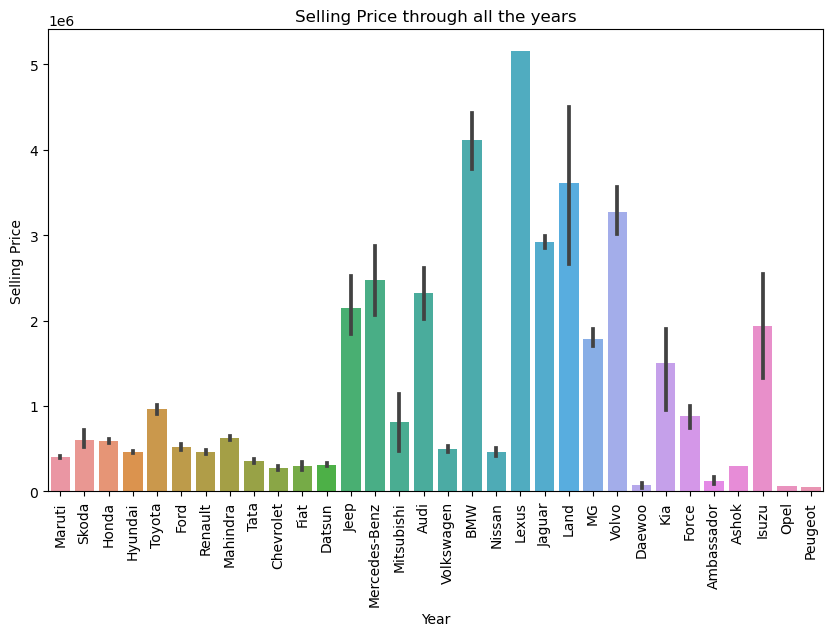

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='name', y='sellP')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.xticks(rotation=90)
plt.show()

Chart doesn't look too good, so let at the other charts and see if it really this bad

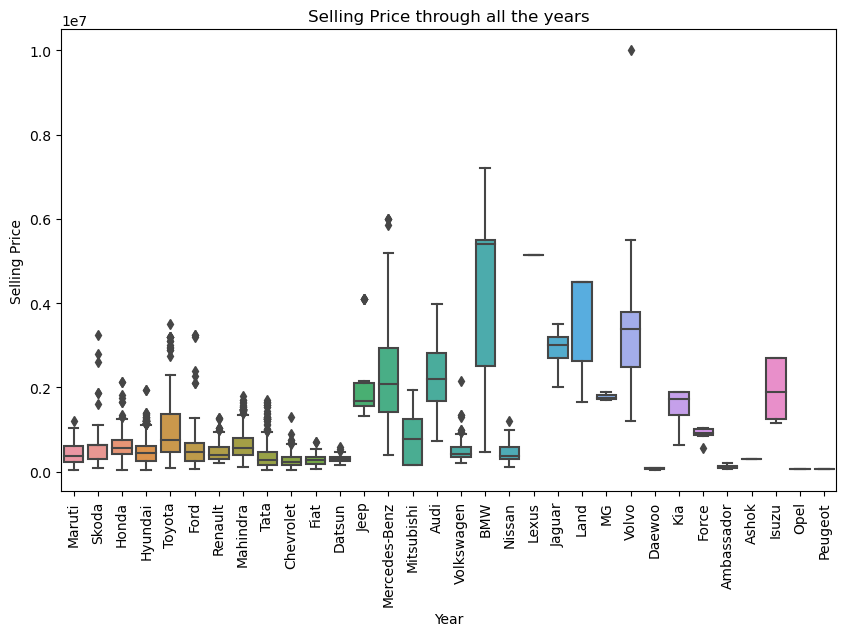

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='name', y='sellP')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.xticks(rotation=90)
plt.show()

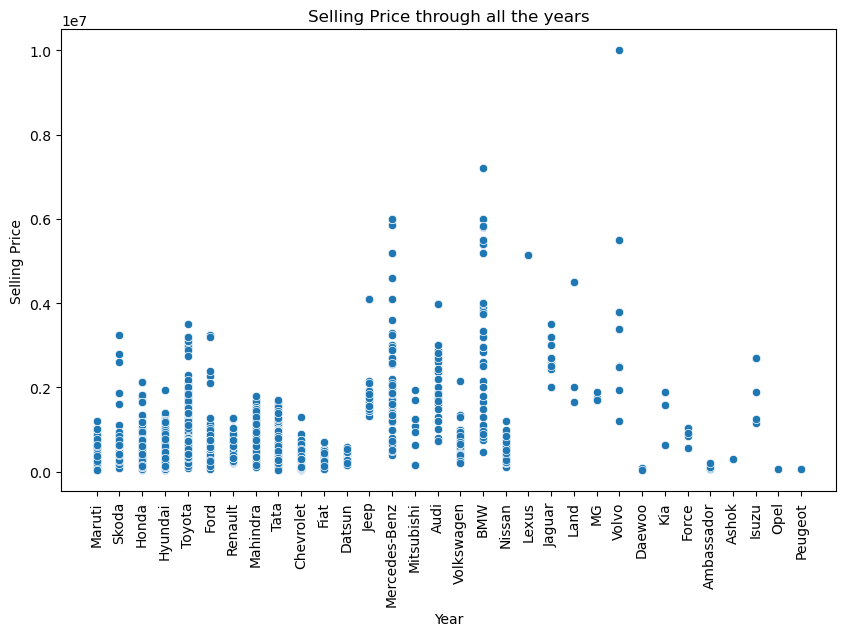

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='name', y='sellP')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.xticks(rotation=90)
plt.show()

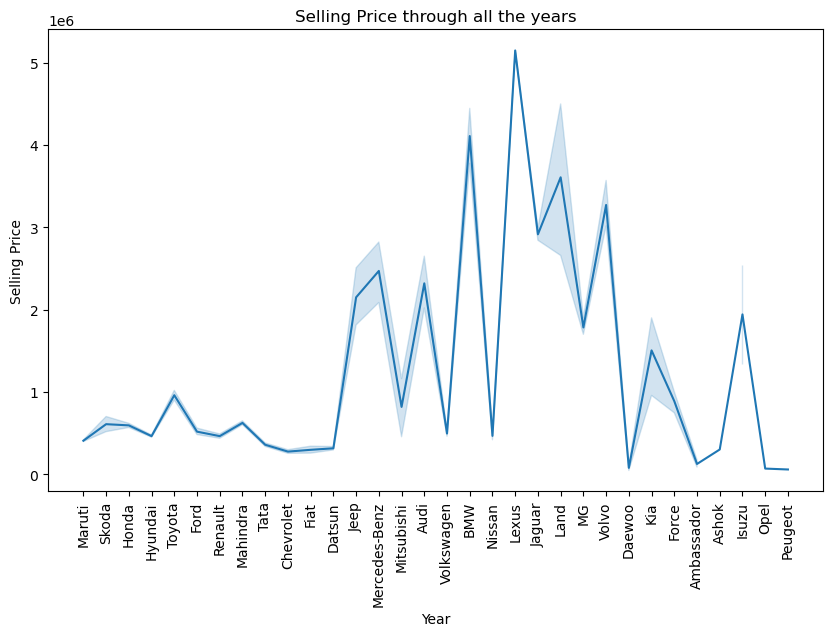

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='name', y='sellP')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price through all the years')
plt.xticks(rotation=90)
plt.show()

Considering from every chart we see, mean that the range of selling prices for different car nems is just too wide. What it mean is that the Car brand is not a strong predictor of selling price and might not provide significant information for our model.

Also, the pattern is too wild and not consist with the other data at all, so for the sake of the accucry of our model, let remove it out 

In [38]:
df = df.drop('name', axis=1)

Let move on to the next feature, see if we need to remove more

Next is 'Km_driven' because we try to visualizing the relatioship between two numerical variables, the scatter is the most suitable choice for this 

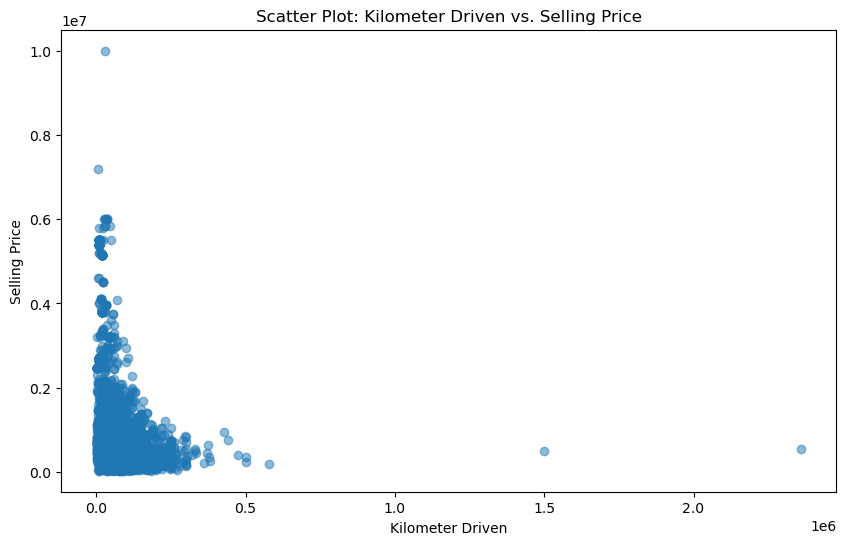

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['km'], df['sellP'], alpha=0.5)
plt.xlabel('Kilometer Driven')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Kilometer Driven vs. Selling Price')
plt.show()

A positively skewed scatter plot indicates that there is an upward trend or positive correlation between the two variables being plotted. In the context of 'km_driven' and 'sellP', it said that the more km in car, the less the price go. 

Which make sense in this context, more used item = less price, the chart aligns with common understanding of how car values tend to decrease as they accumiliate more mileage. This relationship is consistent with the idea that potential buyers typically consider lower mileage as a positive factor when evaluating used cars.

To fix this we may have to mitigate the skewness by convert it into log (like selling price) to make it more linear.

Not to worry so no need remove this, let's move on




These feature is all categorical type, so I will compressed it together in one box

To understand the distribution and charateristics of a datset. Let use Boxplot to see the dataset with selling price as a y to helps us analyze how diffrent categories influence the sellig prices of cars.

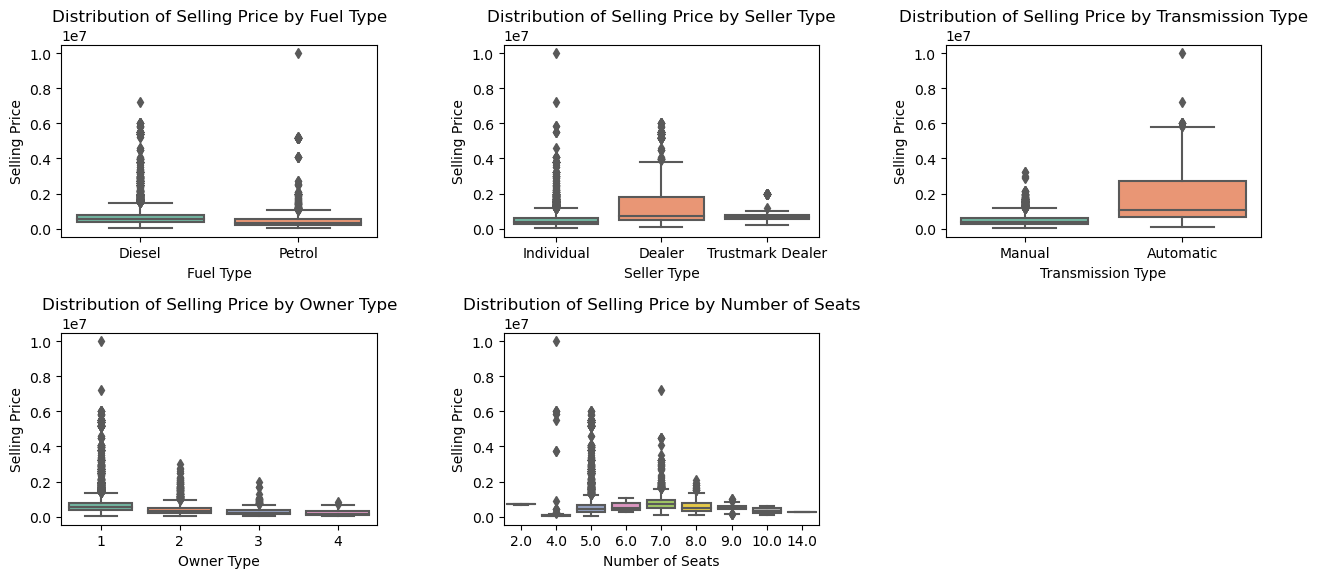

In [40]:
plt.figure(figsize=(15, 6))

# Create a boxplot for 'fuel'
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='fuel', y='sellP', palette='Set2')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price by Fuel Type')

# Create a boxplot for 'seller'
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='seller', y='sellP', palette='Set2')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price by Seller Type')

# Create a boxplot for 'transmission'
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='trans', y='sellP', palette='Set2')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price by Transmission Type')

# Create a boxplot for 'owner'
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='owner', y='sellP', palette='Set2')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price by Owner Type')

# Create a boxplot for 'seats'
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='seats', y='sellP', palette='Set2')
plt.xlabel('Number of Seats')
plt.ylabel('Selling Price')
plt.title('Distribution of Selling Price by Number of Seats')

# Adjust layout with custom spacing between rows and columns
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

# Show the plots
plt.show()

The chart look alright, except for one ploblem. "The outlier" which you can see are so many of them in data. Ths mean we need to do something encoding. 
But before we got there, let take a look that violin chart I found first.

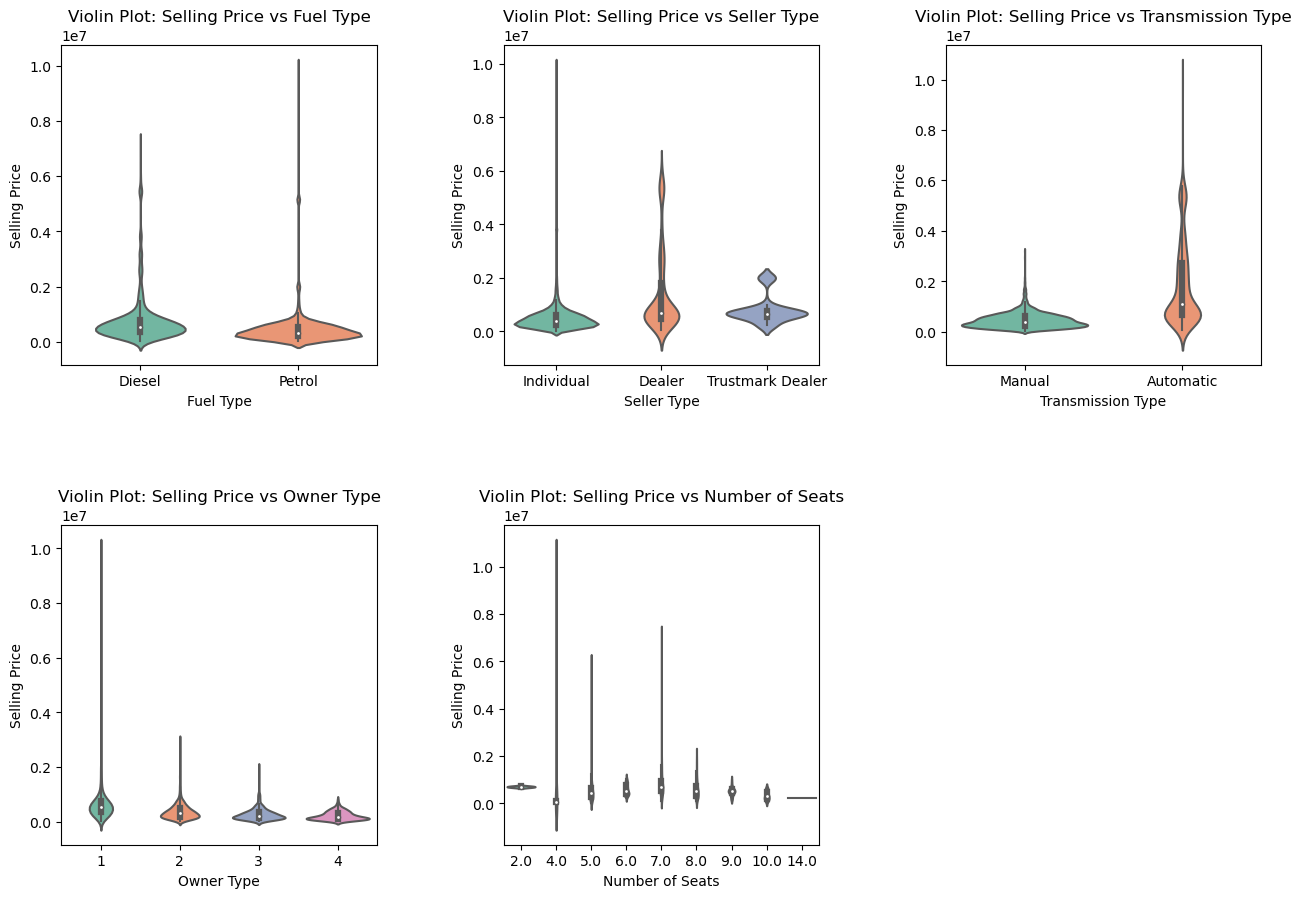

In [41]:

plt.figure(figsize=(15, 10))

# Create violin plots for each categorical feature
plt.subplot(2, 3, 1)
sns.violinplot(data=df, x='fuel', y='sellP', palette='Set2')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Violin Plot: Selling Price vs Fuel Type')

plt.subplot(2, 3, 2)
sns.violinplot(data=df, x='seller', y='sellP', palette='Set2')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Violin Plot: Selling Price vs Seller Type')

plt.subplot(2, 3, 3)
sns.violinplot(data=df, x='trans', y='sellP', palette='Set2')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Violin Plot: Selling Price vs Transmission Type')

plt.subplot(2, 3, 4)
sns.violinplot(data=df, x='owner', y='sellP', palette='Set2')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.title('Violin Plot: Selling Price vs Owner Type')

plt.subplot(2, 3, 5)
sns.violinplot(data=df, x='seats', y='sellP', palette='Set2')
plt.xlabel('Number of Seats')
plt.ylabel('Selling Price')
plt.title('Violin Plot: Selling Price vs Number of Seats')

# Adjust layout with custom spacing between rows and columns
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

# Show the plots
plt.show()


Violin Plot: 
The width mean the estimated probability density
The white doe inside the violin is median (kinda like boxplot)
The lines inside biolin indicate quartiles
The line on the head of violin is the outlier

So, it can be the alternative for boxplot as both can show the spread, central tendency and the presence of outluer within different categories or group. Not really matter for our project that much, I myself found it quite fascinating, but let's move on

## The Encoding
There are two technique that I will be using for these feature
#### Label Encoding

'owner' -> The reason why I LE owner is due to the inherent ordinal nature of the categories. In the context of car ownership, the different owner types can be logically ordered based on the number of times the car has changed hands. The categories 'First Hand', 'Second Hand', 'Third Hand', and 'Fourth and Above' can be arranged in a meaningful sequence where lower values correspond to fewer ownership transitions and higher values correspond to more ownership transitions.



In [42]:
# Label encoding for 'owner' column
LE = LabelEncoder()
df['owner'] = LE.fit_transform(df['owner'])
df.head()

,sellP,km,fuel,seller,trans,owner,mileage,engine,power,seats
0,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,370000,120000,Diesel,Individual,Manual,1,21.14,1498.0,103.52,5.0
2,158000,140000,Petrol,Individual,Manual,2,17.70,1497.0,78.00,5.0
3,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


##### One-hot coding
'fuel' -> Column contains [Diesel, Petrol] Since fuel types are independent categories without a natural order, one-hot encoding is an appropriate choice.

'seller' -> Similarly, the 'seller' column has three non-ordinal categories: 'Individual', 'Dealer', and 'Trustmark Dealer'. These categories represent different types of sellers and don't have any order.

'trans' -> Contains two non-ordinal categories: 'Manual' and 'Automatic'. While I want to label encoding this because from the chart, Automatic car got a better price than Manual car, label encoding might suggest that 'Automatic' is simehow superior or better than 'Manual' in a numerical sense, which isn't true in the case of transmission types. It too complicated is what i'm try to say so i'm just going put this here.

'seats' -> The 'seats' column represents the number of seats in a car, ranging from 2 to 14. I also choose to drop the first category of seats '2 seats' because that category doesn't have a significant presence in the dataset, and the small number of instances could potentially lead to overfitting. By dropping the first column, we ensure that the encoding doesn't introduce unnecessary bias towards the '2' category, allowing the model to focus on the more prevalent seat categories.

In [43]:
# One-hot encoding for other categorical columns
categorical_columns = ['fuel', 'seller', 'trans']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

categorical_columns = ['seats']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
#df = df_encoded

#If there is an error when running this, please 'Run-all' again




Here's you can see all the column I have right now

In [44]:
print(df_encoded.head())

    sellP      km    fuel      seller   trans  owner  mileage  engine   power  \
0  450000  145500  Diesel  Individual  Manual      0    23.40  1248.0   74.00   
1  370000  120000  Diesel  Individual  Manual      1    21.14  1498.0  103.52   
2  158000  140000  Petrol  Individual  Manual      2    17.70  1497.0   78.00   
3  225000  127000  Diesel  Individual  Manual      0    23.00  1396.0   90.00   
4  130000  120000  Petrol  Individual  Manual      0    16.10  1298.0   88.20   

   seats_4.0  seats_5.0  seats_6.0  seats_7.0  seats_8.0  seats_9.0  \
0          0          1          0          0          0          0   
1          0          1          0          0          0          0   
2          0          1          0          0          0          0   
3          0          1          0          0          0          0   
4          0          1          0          0          0          0   

   seats_10.0  seats_14.0  
0           0           0  
1           0           0  
2 

One-hot Encoding:


#### Correlation Matrix

To predicting the car price, we need to find a strong factors and finding some fetaures that are too correlated.

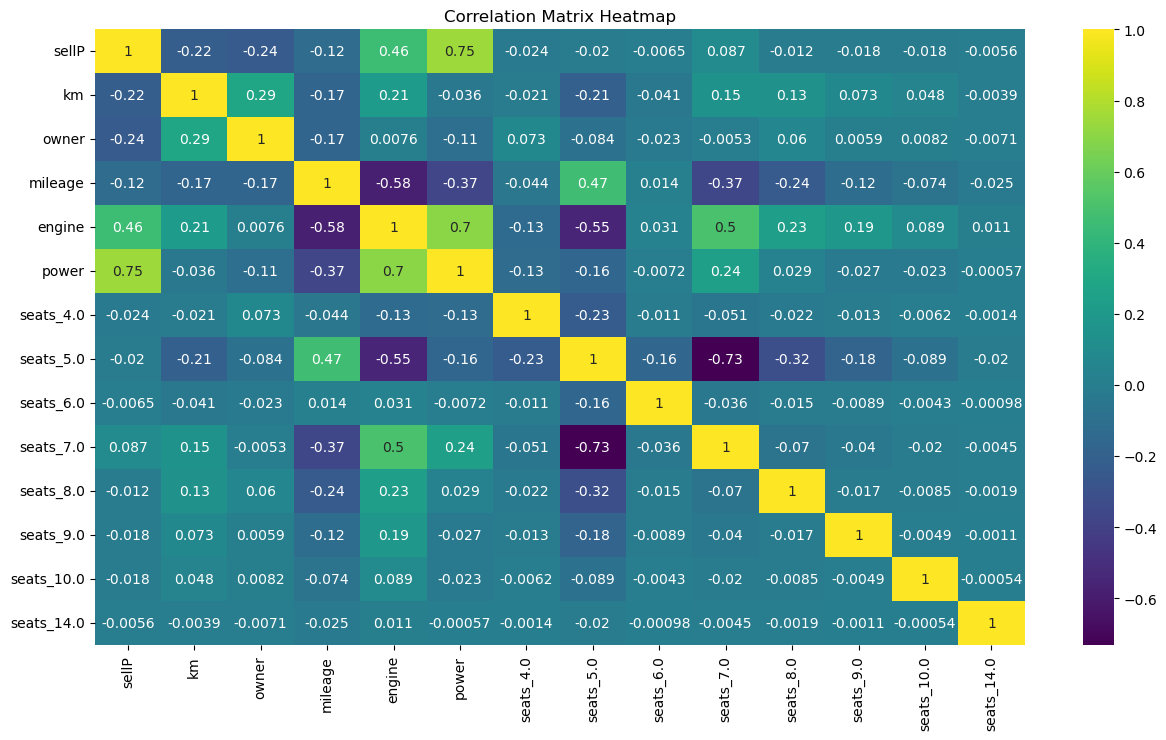

In [45]:
#don't forget these are not all variables! categorical is not here...(not my text)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
# Show the plot
plt.show()

Like I said (or Prof. or TA) these are not all variables. To judge the data we need to look at Predictive Power Score instead

#### Predictive Power Score

Let take a look at our Predictive Power Score


<Axes: xlabel='x', ylabel='y'>

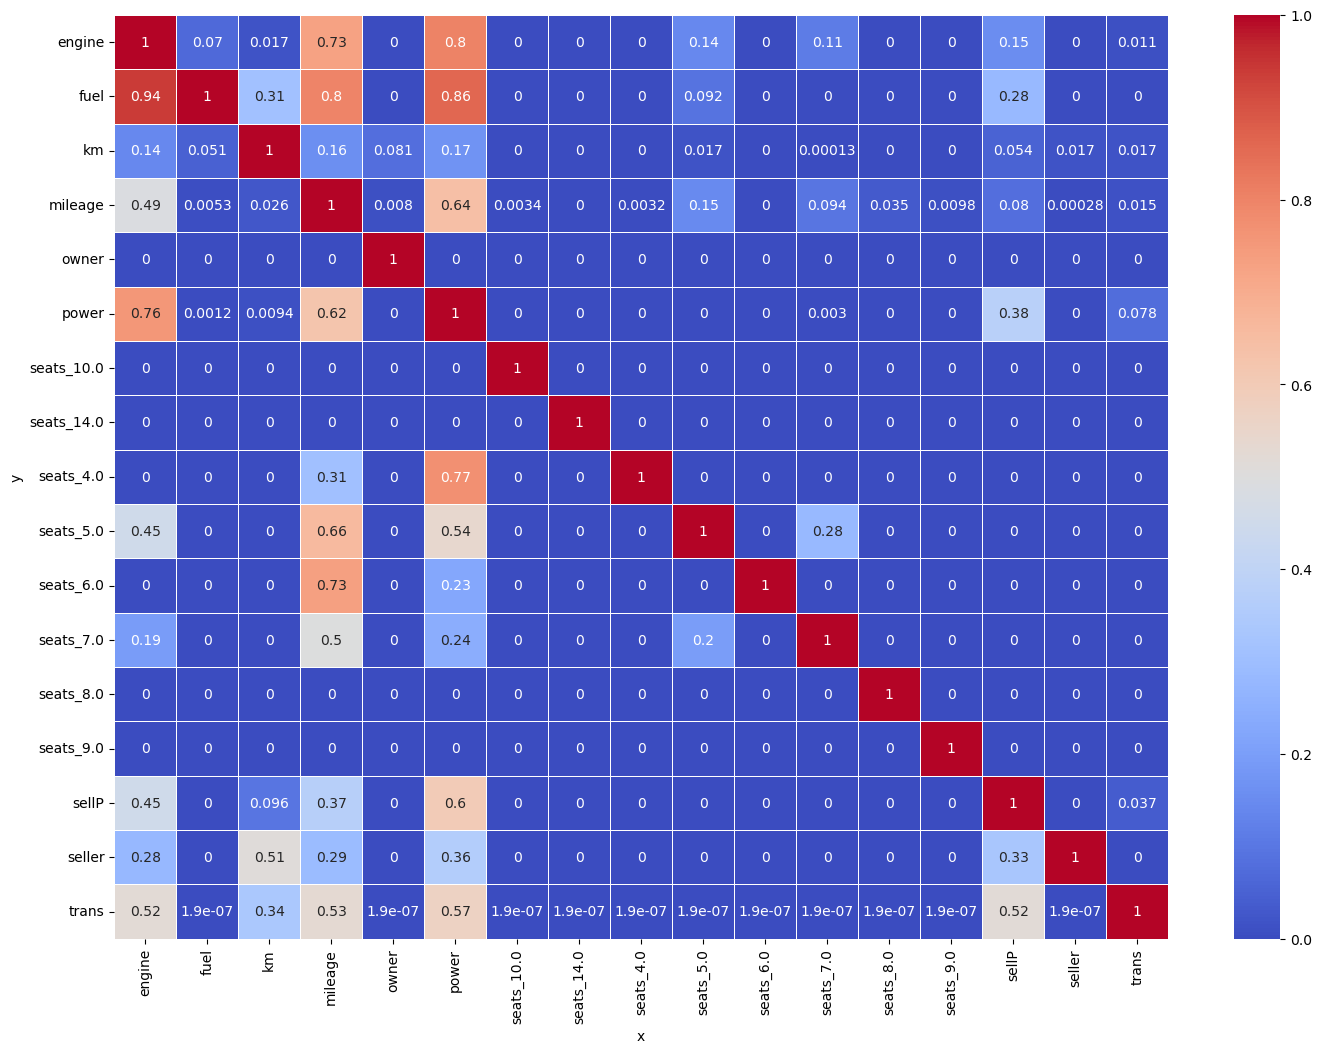

In [46]:
import ppscore as pps

dfcopy = df_encoded.copy()
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (17,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='coolwarm', linewidths=0.5, annot=True)

As you can see, with a ton of 0 and a ton of close to 0 score. It's time for feature engineering

## 3. Feature Engineering

From PPS we can see that it need an improvement (a ton of it) and also the missing data which I think I saw some in dataset, but the main reson is improving model performance. To help model better capture patterns and relationships in the data

##### 2 feature that need to change:

Selling Price: Like the lab paper said "Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform"

KM Driven: From the chart of Km driven shown previously, the chart is positively skewed (relationship with selling price) While this chart is consistent with the idea that potential buyers typically consider lower mileage as a positive factor when evaluating used cars. It may (or maynot) affect our model, so just to be sure, I will also apply logarithmic transformation to make the relationship more linear.

In [47]:
dfcopy["log_sellP"] = np.log(dfcopy["sellP"])
dfcopy["log_km"] = np.log(dfcopy["km"])
dfcopy.head(10)

,sellP,km,fuel,seller,trans,owner,mileage,engine,power,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,log_sellP,log_km
0,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,0,1,0,0,0,0,0,0,13.017003,11.887931
1,370000,120000,Diesel,Individual,Manual,1,21.14,1498.0,103.52,0,1,0,0,0,0,0,0,12.821258,11.695247
2,158000,140000,Petrol,Individual,Manual,2,17.70,1497.0,78.00,0,1,0,0,0,0,0,0,11.970350,11.849398
3,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,0,1,0,0,0,0,0,0,12.323856,11.751942
4,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,0,1,0,0,0,0,0,0,11.775290,11.695247
5,440000,45000,Petrol,Individual,Manual,0,20.14,1197.0,81.86,0,1,0,0,0,0,0,0,12.994530,10.714418
7,45000,5000,Petrol,Individual,Manual,1,16.10,796.0,37.00,1,0,0,0,0,0,0,0,10.714418,8.517193
8,350000,90000,Diesel,Individual,Manual,0,23.59,1364.0,67.10,0,1,0,0,0,0,0,0,12.765688,11.407565
9,200000,169000,Diesel,Individual,Manual,0,20.00,1399.0,68.10,0,1,0,0,0,0,0,0,12.206073,12.037654
10,500000,68000,Diesel,Individual,Manual,1,19.01,1461.0,108.45,0,1,0,0,0,0,0,0,13.122363,11.127263


***Remind myself to not forget to change in back before comparing

## Check Agian

##### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix Heatmap (After log)')

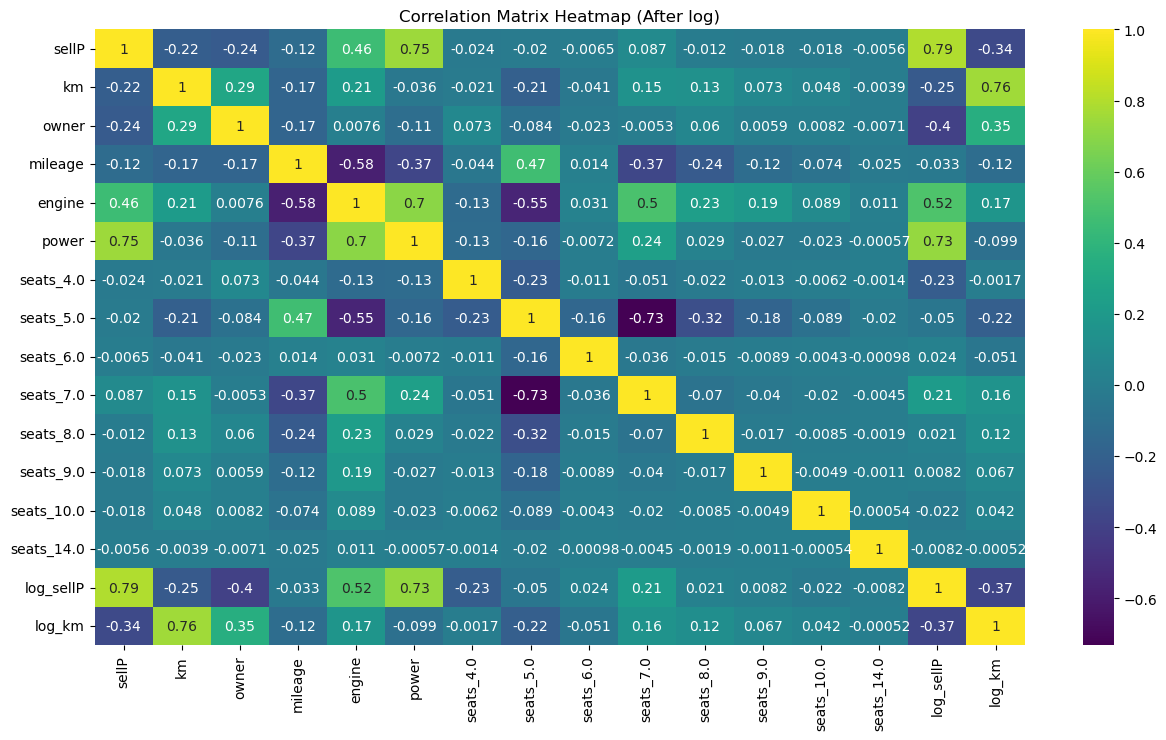

In [48]:
correlation_matrix = dfcopy.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap (After log)')

##### Predictive Power Score

<Axes: xlabel='x', ylabel='y'>

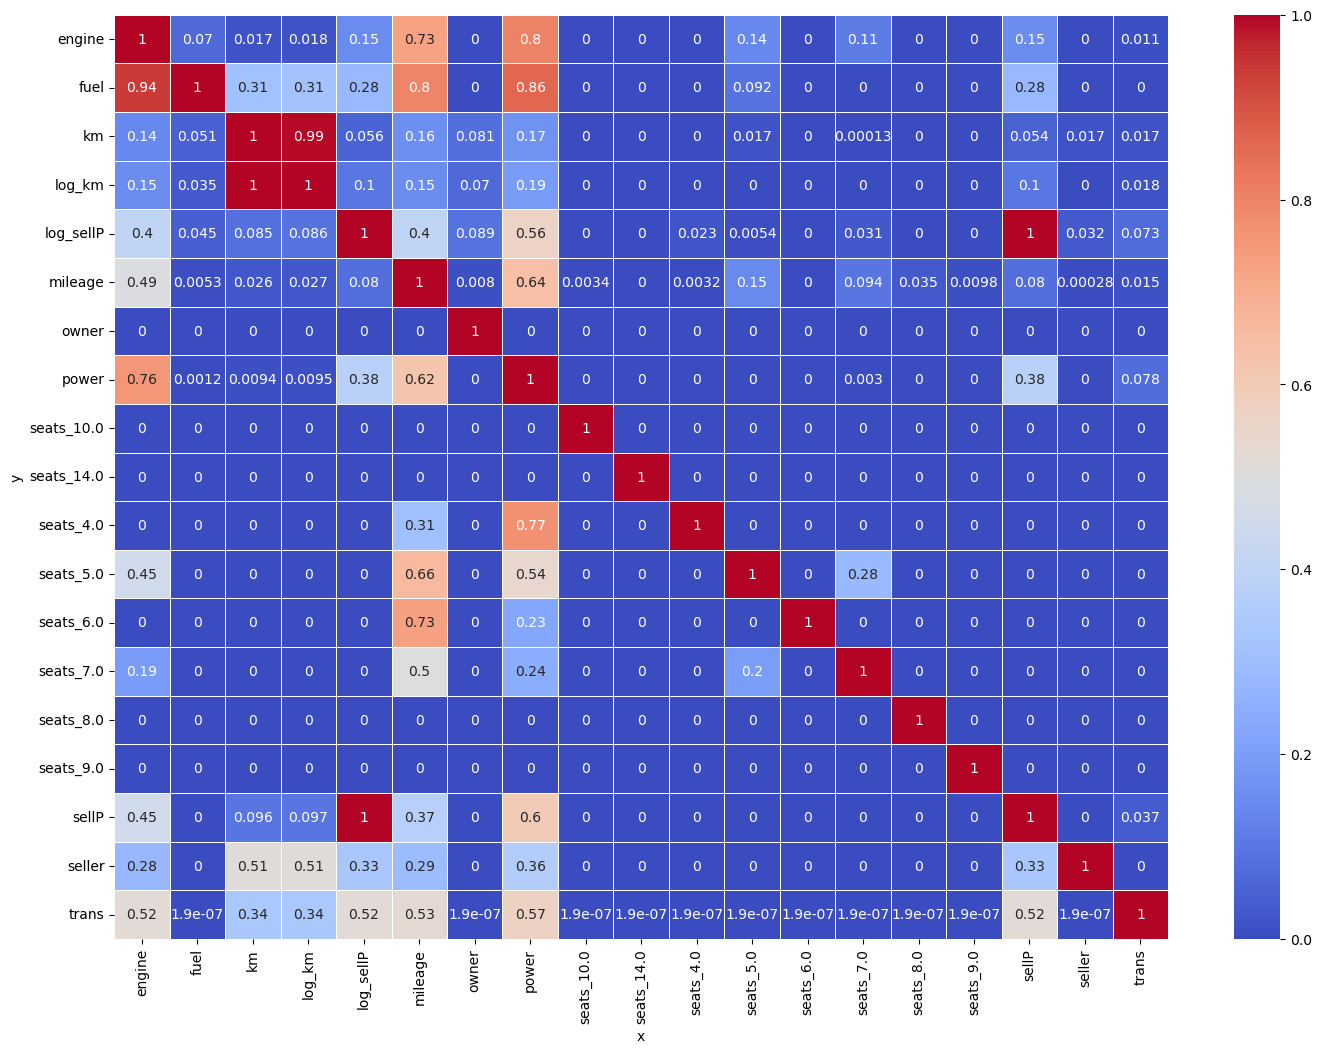

In [49]:
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (17,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='coolwarm', linewidths=0.5, annot=True)

Much better I would say, I even got 0.94 too!

## 4. Feature selection

So now for the choosing of prediction. I choose......Engine, Mileage and power
The reason is of course from the score of PPS, the thing is which way should i choose 
The lesser, the better or The greater, the better?

On one hand having fewer relevant and meaningful features can lead to simpler, more interpretable models that are less prone to overfitting

On the otherhand having a diverse set of relevant features can improve the model's predictive power

At first I thinking of picking 'fuel' also, but when I applied the real world logic into, like if I going to buy a car, would I care if it Pretrol or Diesel?

I wouldn't 

In [50]:
#For testing if 'fuel' would be good for prediction
#X = dfcopy[['engine', 'mileage', 'power','fuel']]

X = dfcopy[['engine', 'mileage', 'power']]
y = dfcopy["sellP"]

### Train test split

To determain proportion of the dateset, usually set to value between 0.2 or 0.3

I will be using 0.25 will 44 rando,_state (excuse my laptop)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

## 5. Preprocessing

### Null values

In [52]:
#check for null values
#.isnull() =, isna() to identify missing values in dataset
#.sum for finding all data missing

#For testing if 'fuel' would be good for prediction
#X_train[['engine', 'mileage', 'power','fuel']].isna().sum()

X_train[['engine', 'mileage', 'power']].isna().sum()


engine     168
mileage    168
power      162
dtype: int64

In [53]:
X_train[['engine', 'mileage', 'power']].sum()

engine     8594467.00
mileage     113299.62
power       538523.62
dtype: float64

In [54]:
#samething but for test 
X_test[['engine', 'mileage', 'power']].isna().sum()

engine     46
mileage    46
power      46
dtype: int64

In [55]:
X_test[['engine', 'mileage', 'power']].sum()

engine     2836748.000
mileage      38229.170
power       179506.635
dtype: float64

In [56]:
#imputer = SimpleImputer(strategy='mean')

##Fit the imputer on X_train
#imputer.fit(X_train[['engine', 'mileage', 'power']])

##Transform the columns with missing values using the imputer
#X_train_imputed = imputer.transform(X_train[['engine', 'mileage', 'power']])

## Create a DataFrame with the imputed values
#X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=['engine', 'mileage', 'power'])

## Display the imputed DataFrame
#print(X_train_imputed_df.head())

In [57]:
y_train.isna().sum()

0

In [58]:
y_test.isna().sum()

0

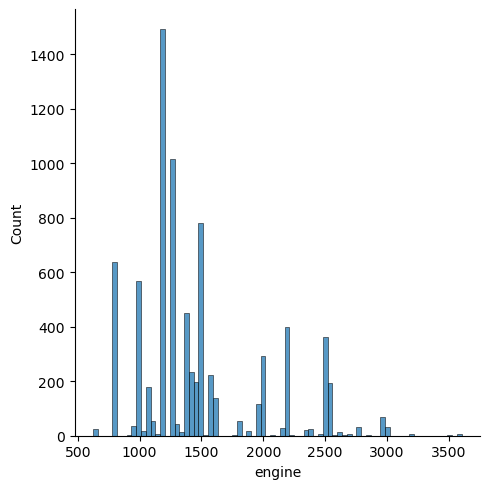

In [59]:
sns.displot(data=dfcopy, x='engine')

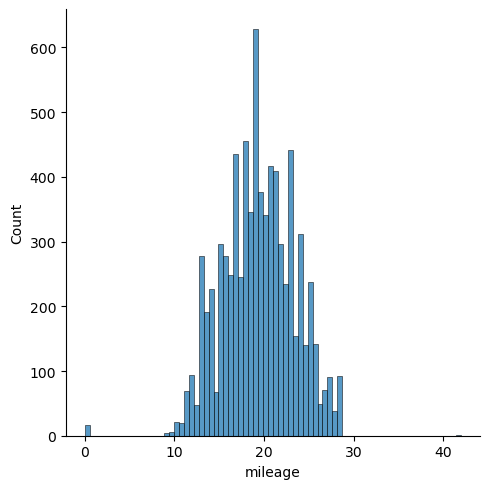

In [60]:
sns.displot(data=dfcopy, x='mileage')

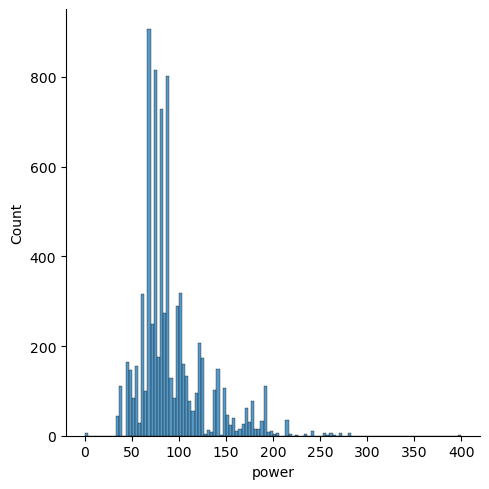

In [61]:
sns.displot(data=dfcopy, x='power')

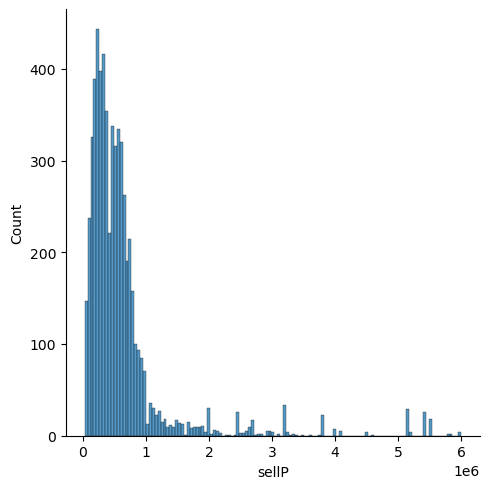

In [62]:
sns.displot(y_train)

##### Imputation
To make up for the missing data, by filling an artificial data from the mean/median 

In this case, the data is far from normal distibution so median it is

In [63]:

# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['power'].fillna(X_train['power'].median(), inplace=True)

In [64]:

# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_test['mileage'].median(), inplace=True)
X_test['power'].fillna(X_test['power'].median(), inplace=True)

In [65]:
#same for y
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_train.median(), inplace=True)

In [66]:
#check again
X_train[['engine', 'mileage', 'power']].isna().sum()

engine     0
mileage    0
power      0
dtype: int64

In [67]:
X_test[['engine', 'mileage', 'power']].isna().sum()

engine     0
mileage    0
power      0
dtype: int64

In [68]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking 
Distory the statistical summary, disproportionately influence the fitting of models, and creating a false assumption to trick the resercher. While this may sound bad, outlier can also benefit th resercher too such as: be indicater of data quality issues like measurement errors or recording errors, or provide valuable insights into the data. Identifying whether outliers are genuine or erroneous can help you understand the underlying patterns and relationships in your data. 

But this lab doesn't need all that, so let just remove it 

Now this process is for inspect distribution of values, and yes this is the prof code. Of course i'm not jsut gonna use his code like this! 

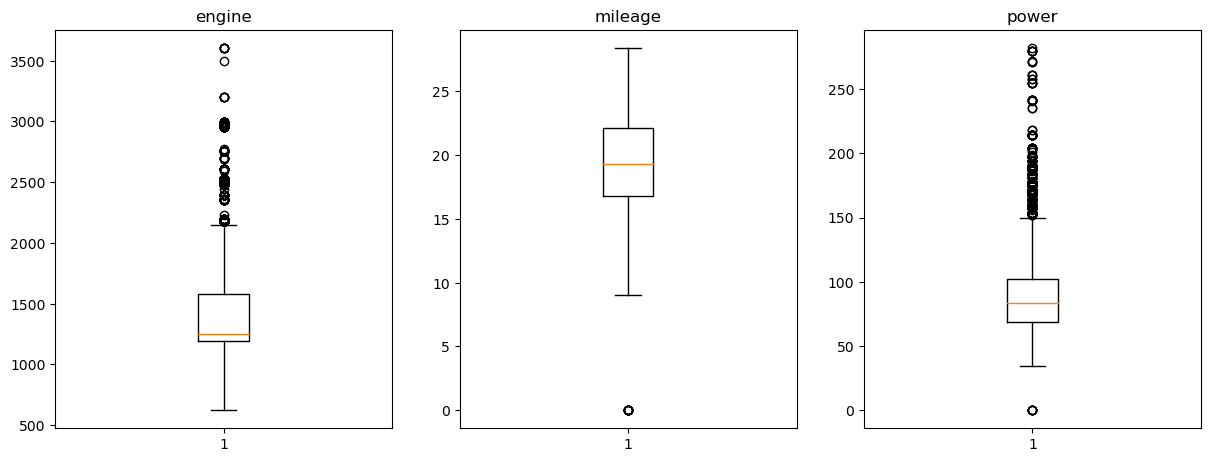

In [69]:
# Create a dictionary of columns.
col_dict = {'engine':1,'mileage':2,'power':3}


# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

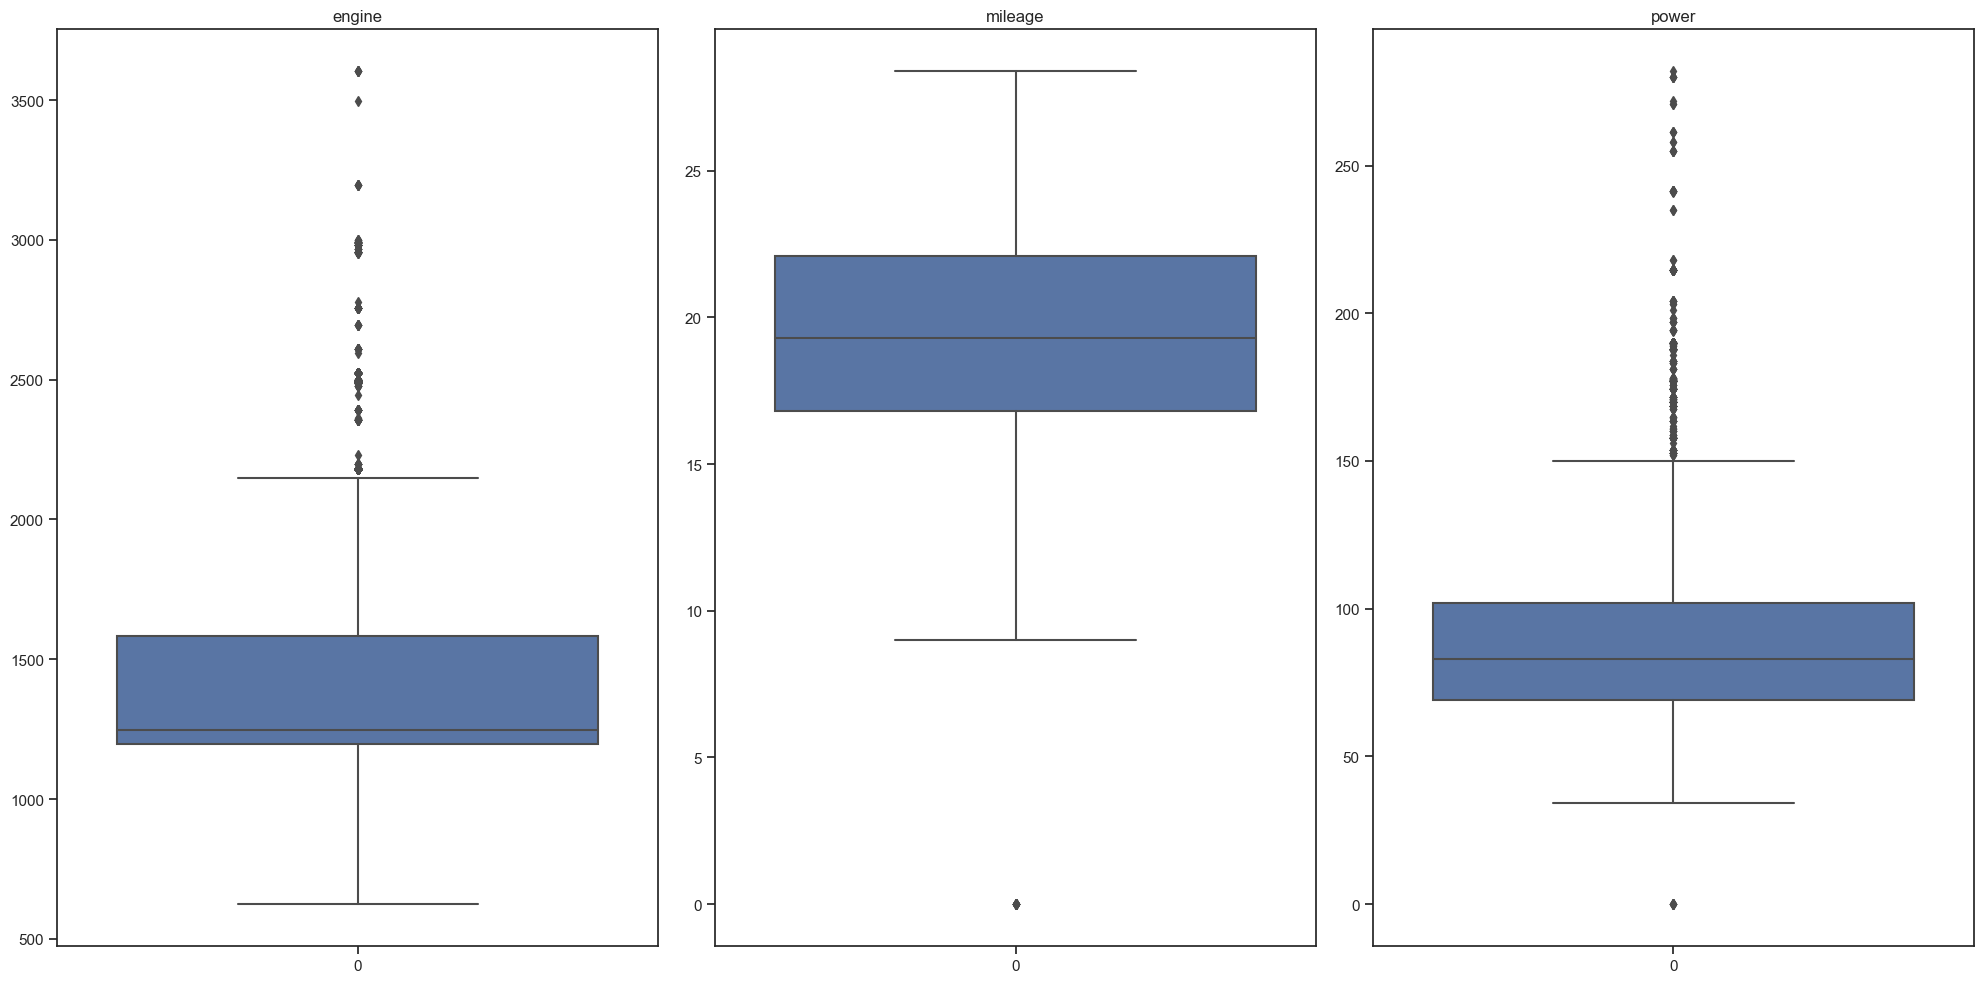

In [70]:
col_dict_me = ['engine', 'mileage', 'power'] #Specify the columns to visualize

plt.figure(figsize=(20, 10)) 
sns.set(style="ticks") #Here the list of style: white, dark, whitegrid, darkgrid, ticks

for i, column in enumerate(col_dict_me, 1): #Loop through each column and create a box plot
    plt.subplot(1, len(col_dict_me), i)  
    sns.boxplot(data=X_train[column])
    plt.title(column)  

plt.tight_layout()  
plt.show()  

In [71]:
def outlier_count(col, data=X_train):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75) #Calculate the 25th and 75th percentiles (Q1 and Q3)
    iqr = q3 - q1 #Calculate the interquartile range (IQR)
    lower_bound = q1 - 1.5 * iqr #Calculate the lower and upper bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count = len(outliers) #Count the number of outliers
    outlier_percent = (outlier_count / len(data[col])) * 100 #Calculate the percentage of outliers
    
    if outlier_count > 0: #Show the information of outliers (if any)
        print("\n" + 15 * '-' + col + 15 * '-' + "\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is an outlier: {}%'.format(outlier_percent))

In [72]:
for col in ['engine', 'mileage', 'power']: #Call the function for each column
    outlier_count(col)



---------------engine---------------

Number of outliers: 888
Percent of data that is an outlier: 14.74838066766318%

---------------mileage---------------

Number of outliers: 14
Percent of data that is an outlier: 0.2325195150307258%

---------------power---------------

Number of outliers: 444
Percent of data that is an outlier: 7.37419033383159%


Engine: 14.75% indicates that a significant portion of the data points have values that deviate from the norm. The reason is outside the scope of my work, but there may be some error or the unique cases for some car. If this is a real world scenario then we need to investigate and investigate the extreme values further and decide whether to keep, transform, or removei it

Mileage: 0.23% The majority of data points fall within a relatively narrow range. It good sign actully, mean data is clustered aroud a central value

Power: 7.37% A notable portion of data points have values that are significantly different from the rest. Like the 'engine' feature, this might be due to various factors, including differences in car models, errors, or unique cases. But still not as extream as Engine

##### In conclusion:
 The outlier percentages are relatively high for both 'engine' and 'power', suggesting that there are considerable deviations from the norm in these features. Depend on the significance and relevance, I may need to remove or transform 
 
 Maybe, maybe not


### Scaling
Transforming featues so they are on same/similar scale. Important for algorithms that sensitive to the scale of input features

Because my data isn't follows normal distribution
##### Normalization
is the way


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#x = (x - mean) / std
#why do we want to scale our data before data analysis / machine learning

#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <----another way
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <====current way
# (x - x_min) / (x_max - x_min)
#---> when data DOES NOT follow normal distribution (e.g., audio, signal, image)

In [74]:
#Check the shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6021, 3)
Shape of X_test:  (2007, 3)
Shape of y_train:  (6021,)
Shape of y_test:  (2007,)


## 6. Modeling
From [Scikit-Learn](http://scikit-learn.org) 
We got a wide variety of algorithms to choose from

Before choosing, let test all of it first

First we import all model we (can) find, and create a list of model I want to test, but not everything. The limitation of my laptop is the main reason why I only choose 8 algorithiums

In [75]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score #This is from case study

#Other algorithims for testing ppol
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Heard good thing about this model, too bad my laptop is on his death bed now so I will have to skip this :(
#from xgboost import XGBRegresso

from sklearn.neighbors import KNeighborsRegressor

#For K-Fold Cross Validation - A technique for evalauting predictive modles
from sklearn.model_selection import KFold, cross_val_score

Al = [LinearRegression(), Ridge(), Lasso(), SVR(),
        KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
        RandomForestRegressor(n_estimators = 200, random_state = 0)]   

#yhat = Al.predict(X_test)

Al_name = ["LinearRegression", "Ridge","Lasso", 
           "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "RandomForestRegressor"]

To test all the algorithims here, I wil be using the calculation of MSE result as a criteria to see who got the best value

In [76]:
kfold = KFold(n_splits=7, shuffle=True) #Dataset divied into k subsets, trained and evauated k times , using a different subset as the validation set each time

for i, model in enumerate(Al):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{Al_name[i]} - Score: {scores}; Mean: {scores.mean()}")

LinearRegression - Score: [-2.24143295e+11 -2.79198776e+11 -2.31060750e+11 -3.53107433e+11
 -2.64172771e+11 -2.65196401e+11 -2.46989474e+11]; Mean: -266266985782.8203
Ridge - Score: [-2.97501804e+11 -2.26975279e+11 -2.30107298e+11 -2.40687208e+11
 -2.62754206e+11 -2.89376513e+11 -3.14993993e+11]; Mean: -266056614577.91733
Lasso - Score: [-3.04285815e+11 -2.17868660e+11 -2.17735357e+11 -2.36826060e+11
 -3.03283726e+11 -3.00619517e+11 -2.86067142e+11]; Mean: -266669468182.46478


SVR - Score: [-7.26255160e+11 -6.36952775e+11 -5.06129880e+11 -7.37187520e+11
 -6.40504151e+11 -8.38585574e+11 -5.92907194e+11]; Mean: -668360321832.5293
KNeighborsRegressor - Score: [-7.22229624e+10 -1.02140028e+11 -4.72882746e+10 -8.64383529e+10
 -4.57443021e+10 -8.10584535e+10 -6.63315534e+10]; Mean: -71603418197.19008
DecisionTreeRegressor - Score: [-4.64667940e+10 -5.07728341e+10 -3.19235394e+10 -3.97315418e+10
 -5.68003205e+10 -4.56424041e+10 -4.54801786e+10]; Mean: -45259658925.739815
RandomForestRegressor - Score: [-4.17234763e+10 -3.47938949e+10 -4.06287369e+10 -3.22035760e+10
 -4.27936403e+10 -6.08950125e+10 -6.15015461e+10]; Mean: -44934269006.68915


#### The result is......"Lasso"!!!
with Mean: -265891660753.11923


This mean Lasso model is most suitable and the best model for my dataset.

Hmm...it seems random forest do very well....how about we grid search further to find the best version of the model.

### Grid Search
To find the best parameters inside Lasso for Car price 
For Lasso:
> fit_intercept: {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge = Ridge()

# Create GridSearchCV instance
grid = GridSearchCV(estimator = ridge, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Ridge: ", grid.best_params_)
print("Best Score for Ridge: ", -grid.best_score_)



Best Parameters for Ridge:  {'alpha': 1}
Best Score for Ridge:  267079407708.8607


In [83]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [84]:
best_mse   #ignore the minus because it's neg_mean_squared_error#

-267079407708.8607

## 7. Testing

Nothing much, now we just test the score (MSE and R^2)

In [86]:
# Get the best Ridge model from the grid search
#best_ridge_model = grid.best_estimator_

# Predict using the best Ridge model
#pred_y_ridge = best_ridge_model.predict(X_test)

# Calculate and print the MSE and R-squared for Ridge
#mse_ridge = mean_squared_error(np.exp(y_test), np.exp(pred_y_ridge))
#r2_ridge = r2_score(np.exp(y_test), np.exp(pred_y_ridge))

#print("MSE of Ridge model: ", mse_ridge)
#print("R-squared of Ridge model: ", r2_ridge)

ValueError: Input contains infinity or a value too large for dtype('float64').

You may wonder why I # the testing, well it look like the Input contains infinity or a value too large for dtype('float64'). And I still tried to figure it out why it like this so... yeah

In [ ]:
#yhat = grid.predict(X_test)
#mean_squared_error(y_test, yhat)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [105]:
import pickle

# save the model to disk
filename = 'Car_Predict.model'
pickle.dump(grid, open(filename, 'wb'))

In [106]:
with open(filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [107]:
#let's try to create one silly example

dfcopy[["engine","mileage","power","sellP"]].loc[1]

engine       1498.00
mileage        21.14
power         103.52
sellP      370000.00
Name: 1, dtype: float64

In [110]:
# Check if model could be applied.
sample = np.array([[1498, 21.14, 103.52]])
predicted_CarP = loaded_model.predict(sample)
np.exp(predicted_CarP)

array([inf])

## Summary